# Convolutional Neural Networks and Computer Vision with Tensorflow

Computer vision is a practice of writing algo which discover pattern in visual data, camera in self driving car for example.



# Get Data

data used is subset of "Food 101" which includes 101 classes.

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# unzip it
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2021-05-22 15:06:21--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.202.128, 74.125.142.128, 74.125.195.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.202.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.50M   103MB/s    in 1.0s    

2021-05-22 15:06:22 (103 MB/s) - ‘pizza_steak.zip’ saved [109579078/109579078]



# Inspect the data

In [3]:
!ls pizza_steak

test  train


In [4]:
!ls pizza_steak/train

pizza  steak


In [5]:
!ls pizza_steak/train/pizza

1008104.jpg  1638227.jpg  2235981.jpg  2774899.jpg  3464027.jpg  576236.jpg
1008144.jpg  1646974.jpg  2236914.jpg  2775763.jpg  3464858.jpg  5764.jpg
1008844.jpg  1649108.jpg  2241448.jpg  2778214.jpg  3473991.jpg  579691.jpg
1008941.jpg  1649276.jpg  2247711.jpg  277963.jpg   3475936.jpg  593400.jpg
1011404.jpg  1652943.jpg  2253670.jpg  2785084.jpg  3478964.jpg  59445.jpg
102037.jpg   1654444.jpg  2255361.jpg  2793535.jpg  3479875.jpg  596494.jpg
1026922.jpg  1660415.jpg  2274117.jpg  27963.jpg    3479936.jpg  598381.jpg
1029698.jpg  1663749.jpg  2279642.jpg  2800325.jpg  3484590.jpg  604977.jpg
1033251.jpg  1665654.jpg  2280345.jpg  2811032.jpg  3493457.jpg  608085.jpg
1035854.jpg  166823.jpg   2285269.jpg  282013.jpg   349946.jpg	 618021.jpg
1038357.jpg  1670471.jpg  2285942.jpg  2821034.jpg  350358.jpg	 61822.jpg
1040878.jpg  1671531.jpg  228778.jpg   2821048.jpg  3505182.jpg  618348.jpg
1044524.jpg  1678284.jpg  2291093.jpg  2827938.jpg  3512070.jpg  625687.jpg
1044789.jpg  16810

In [6]:
import os

# walk trough the pizza_steak directory and list number of files

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"{len(dirnames)} directories and {len(filenames)} files in '{dirpath}'. ")

2 directories and 1 files in 'pizza_steak'. 
2 directories and 1 files in 'pizza_steak/test'. 
0 directories and 250 files in 'pizza_steak/test/steak'. 
0 directories and 250 files in 'pizza_steak/test/pizza'. 
2 directories and 1 files in 'pizza_steak/train'. 
0 directories and 750 files in 'pizza_steak/train/steak'. 
0 directories and 750 files in 'pizza_steak/train/pizza'. 


In [7]:
num_steak_images_train = len(os.listdir('pizza_steak/train/steak'))

num_steak_images_train

750

In [8]:
# Get class names
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Extract the class names from data directory
class_names = class_names[1:] # there are extra files that are not a file folder that we need to remove
print(class_names)

['pizza' 'steak']


In [16]:
#show images
import matplotlib.pyplot as plt
import matplotlib.image as mpigm
import random
import os

def viewrandom(target_dir, target_class):
  target_folder = target_dir+target_class

  #get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)
  print(random_image)

  #read and plot image
  img = mpigm.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image shape: {img.shape}')
  return img

['2511911.jpg']
Image shape: (512, 512, 3)


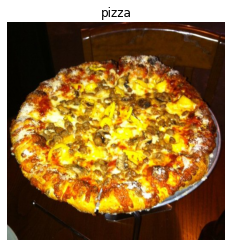

In [10]:
img = viewrandom(target_dir='pizza_steak/train/', target_class='pizza')

In [11]:
img

array([[[  7,   6,   2],
        [  7,   6,   2],
        [  7,   6,   2],
        ...,
        [ 35,  16,  18],
        [ 36,  17,  19],
        [ 36,  17,  19]],

       [[  7,   6,   2],
        [  7,   6,   2],
        [  7,   6,   2],
        ...,
        [ 37,  18,  20],
        [ 37,  18,  20],
        [ 37,  18,  20]],

       [[  7,   6,   2],
        [  7,   6,   2],
        [  7,   6,   2],
        ...,
        [ 37,  18,  20],
        [ 37,  18,  20],
        [ 36,  17,  19]],

       ...,

       [[122, 134, 124],
        [122, 133, 125],
        [123, 134, 126],
        ...,
        [ 18,   9,   4],
        [ 17,   8,   3],
        [ 16,   7,   2]],

       [[122, 134, 124],
        [122, 133, 125],
        [123, 134, 126],
        ...,
        [ 17,   8,   3],
        [ 16,   7,   2],
        [ 14,   5,   0]],

       [[122, 134, 124],
        [123, 134, 126],
        [123, 134, 126],
        ...,
        [ 15,   6,   1],
        [ 14,   5,   0],
        [ 11,   2,   0]]

In [12]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 512, 3), dtype=uint8, numpy=
array([[[  7,   6,   2],
        [  7,   6,   2],
        [  7,   6,   2],
        ...,
        [ 35,  16,  18],
        [ 36,  17,  19],
        [ 36,  17,  19]],

       [[  7,   6,   2],
        [  7,   6,   2],
        [  7,   6,   2],
        ...,
        [ 37,  18,  20],
        [ 37,  18,  20],
        [ 37,  18,  20]],

       [[  7,   6,   2],
        [  7,   6,   2],
        [  7,   6,   2],
        ...,
        [ 37,  18,  20],
        [ 37,  18,  20],
        [ 36,  17,  19]],

       ...,

       [[122, 134, 124],
        [122, 133, 125],
        [123, 134, 126],
        ...,
        [ 18,   9,   4],
        [ 17,   8,   3],
        [ 16,   7,   2]],

       [[122, 134, 124],
        [122, 133, 125],
        [123, 134, 126],
        ...,
        [ 17,   8,   3],
        [ 16,   7,   2],
        [ 14,   5,   0]],

       [[122, 134, 124],
        [123, 134, 126],
        [123, 134, 126],
        ...,
        [ 15,   6,   

In [13]:
img.shape #(width, height, color channel)

(512, 512, 3)

build a CNN to find pattern in images

- load images
- preprocess images
- build a cnn to find pattern
- compile cnn model
- fit

In [14]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

tf.random.set_seed(42)

#scale the image data so we have 0 to 1 value instead of 0 to 255
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#setup paths
train_dir = '/content/pizza_steak/train'
test_dir = 'pizza_steak/test'

#import data to directories, turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                         batch_size = 32,
                                         target_size = (224, 224),
                                         class_mode='binary',
                                         seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                         batch_size = 32,
                                         target_size = (224, 224),
                                         class_mode='binary',
                                         seed=42)

# Build a CNN model
model1 = tf.keras.models.Sequential([
                                     tf.keras.layers.Conv2D(filters=10,
                                                            kernel_size=3,
                                                            activation='relu',
                                                            input_shape=(224,224,3)),
                                     tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                     tf.keras.layers.MaxPool2D(pool_size=2,
                                                               padding='valid'),
                                     tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                     tf.keras.layers.Conv2D(10, 3, activation='relu'),
                                     tf.keras.layers.MaxPool2D(pool_size=2,
                                                               padding='valid'),
                                     tf.keras.layers.Flatten(),
                                     tf.keras.layers.Dense(1, activation='sigmoid')
])

#compile
model1.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

hist1 = model1.fit(train_data, 
                   epochs = 5,
                   steps_per_epoch = len(train_data),
                   validation_data = valid_data,
                   validation_steps = len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.
Epoch 1/5
47/47 [==============================] - 39s 187ms/step - loss: 0.6426 - accuracy: 0.6012 - val_loss: 0.4265 - val_accuracy: 0.7960
Epoch 2/5
47/47 [==============================] - 8s 178ms/step - loss: 0.4445 - accuracy: 0.7998 - val_loss: 0.3429 - val_accuracy: 0.8560
Epoch 3/5
47/47 [==============================] - 8s 177ms/step - loss: 0.4022 - accuracy: 0.8209 - val_loss: 0.3354 - val_accuracy: 0.8520
Epoch 4/5
47/47 [==============================] - 8s 175ms/step - loss: 0.3596 - accuracy: 0.8492 - val_loss: 0.3275 - val_accuracy: 0.8700
Epoch 5/5
47/47 [==============================] - 8s 175ms/step - loss: 0.3121 - accuracy: 0.8688 - val_loss: 0.3477 - val_accuracy: 0.8560


In [15]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

# Non CNN model

In [18]:
tf.random.set_seed(42)

model2 = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(224,224,3)),
                              tf.keras.layers.Dense(4, activation='relu'),
                              tf.keras.layers.Dense(4, activation='relu'),
                              tf.keras.layers.Dense(1, activation='sigmoid')
])

#compile
model2.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

hist2 = model2.fit(train_data, 
                   epochs = 5,
                   steps_per_epoch = len(train_data),
                   validation_data = valid_data,
                   validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 8s 174ms/step - loss: 1.3126 - accuracy: 0.5183 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 8s 170ms/step - loss: 0.6932 - accuracy: 0.5016 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 8s 170ms/step - loss: 0.6931 - accuracy: 0.5088 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 8s 169ms/step - loss: 0.6932 - accuracy: 0.5002 - val_loss: 0.6931 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 8s 169ms/step - loss: 0.6932 - accuracy: 0.4754 - val_loss: 0.6931 - val_accuracy: 0.5000


In [19]:
tf.random.set_seed(42)

model3 = tf.keras.Sequential([
                              tf.keras.layers.Flatten(input_shape=(224,224,3)),
                              tf.keras.layers.Dense(100, activation='relu'),
                              tf.keras.layers.Dense(100, activation='relu'),
                              tf.keras.layers.Dense(100, activation='relu'),
                              tf.keras.layers.Dense(1, activation='sigmoid')
])

#compile
model3.compile(loss = 'binary_crossentropy',
               optimizer = tf.keras.optimizers.Adam(),
               metrics=['accuracy'])

hist3 = model3.fit(train_data, 
                   epochs = 5,
                   steps_per_epoch = len(train_data),
                   validation_data = valid_data,
                   validation_steps = len(valid_data))

Epoch 1/5
47/47 [==============================] - 9s 174ms/step - loss: 4.9468 - accuracy: 0.6123 - val_loss: 0.7002 - val_accuracy: 0.7020
Epoch 2/5
47/47 [==============================] - 8s 169ms/step - loss: 1.0363 - accuracy: 0.6862 - val_loss: 0.7479 - val_accuracy: 0.6480
Epoch 3/5
47/47 [==============================] - 8s 171ms/step - loss: 0.8042 - accuracy: 0.6985 - val_loss: 1.0917 - val_accuracy: 0.6000
Epoch 4/5
47/47 [==============================] - 8s 171ms/step - loss: 0.6895 - accuracy: 0.7217 - val_loss: 0.4994 - val_accuracy: 0.7800
Epoch 5/5
47/47 [==============================] - 8s 170ms/step - loss: 0.5453 - accuracy: 0.7608 - val_loss: 0.4464 - val_accuracy: 0.7980


Yes the model improved but look at the summary

In [20]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_9 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_10 (Dense)             (None, 100)               10100     
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


look how many parameters are there in the model, and the model doesnt even perform close to CNN model.

# Binary Classification Break Down

1. Data Exploring
2. Data Preprocessing
3. Create model
4. Fit model
5. Evaluate
6. Improve and Experiment until satisfied

# 1. Explore

['97656.jpg']
Image shape: (512, 512, 3)
['1742542.jpg']
Image shape: (512, 384, 3)


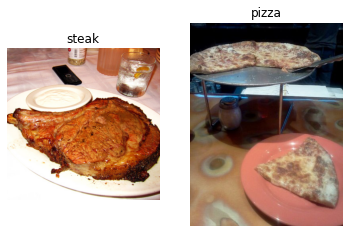

In [24]:
# Viz
plt.figure()
plt.subplot(1, 2, 1)
steak_img = viewrandom('pizza_steak/train/', 'steak')
plt.subplot(1, 2, 2)
steak_img = viewrandom('pizza_steak/train/', 'pizza')

# 2. Preprocess the data (prep it for a model)

In [29]:
# Define directory
train_dir = 'pizza_steak/train/'
test_dir = 'pizza_steak/test/'

# Batching

Batch is subset of our data, so rather than feeding all the data into the model all at once, instead the model only look at subset of the data, decided by the number of batches at a time.

reason for this is to make it easy for the machine to train the model, imagine 10000000 images, wont fit into memory of most machine.

trying to learn pattern of large image set all at one time might result the model not being able to learn very well.

In [30]:
# Create train and test data generator and rescale the data.

from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [31]:
train_data = train_datagen.flow_from_directory(directory=train_dir, #target directory
                                               target_size=(224, 224), #target size of our images
                                               class_mode='binary', #how many classes
                                               batch_size=32) # size of the batches, 10 batch size on 1000 images, meaning we have 10 batches with 100 images in it

test_data = train_datagen.flow_from_directory(directory=test_dir,
                                               target_size=(224, 224),
                                               class_mode='binary',
                                               batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [32]:
#batch sample
images, labels = train_data.next()
len(images), len(labels)

(32, 32)

In [35]:
#how many batches?
len(train_data), 'rounded up from', 1500/32

(47, 'rounded up from', 46.875)

In [36]:
images[0], images[0].shape

(array([[[0.47058827, 0.40784317, 0.34509805],
         [0.4784314 , 0.427451  , 0.3647059 ],
         [0.48627454, 0.43529415, 0.37254903],
         ...,
         [0.8313726 , 0.70980394, 0.48627454],
         [0.8431373 , 0.73333335, 0.5372549 ],
         [0.87843144, 0.7725491 , 0.5882353 ]],
 
        [[0.50980395, 0.427451  , 0.36078432],
         [0.5058824 , 0.42352945, 0.35686275],
         [0.5137255 , 0.4431373 , 0.3647059 ],
         ...,
         [0.82745105, 0.7058824 , 0.48235297],
         [0.82745105, 0.70980394, 0.5058824 ],
         [0.8431373 , 0.73333335, 0.5372549 ]],
 
        [[0.5254902 , 0.427451  , 0.34901962],
         [0.5372549 , 0.43921572, 0.36078432],
         [0.5372549 , 0.45098042, 0.36078432],
         ...,
         [0.82745105, 0.7019608 , 0.4784314 ],
         [0.82745105, 0.7058824 , 0.49411768],
         [0.8352942 , 0.7176471 , 0.5137255 ]],
 
        ...,
 
        [[0.77647066, 0.5647059 , 0.2901961 ],
         [0.7803922 , 0.53333336, 0.22352

our data has been successfully transformed into pixel range 0-1 to represent the actual number of 0-255, and shaped to (224, 224, 3)

## Create a CNN Model

In [37]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [48]:
model4 = Sequential([
                     Conv2D(filters=10, #number of sliding windows flitering our images
                            kernel_size=3, #size of that windows
                            strides=1, #size of the step sliding windows take when filtering our images
                            padding='valid',
                            activation='relu',
                            input_shape=(224, 224, 3)),
                     Conv2D(10, 3, activation='relu'),
                     Conv2D(10, 3, activation='relu'),
                     Flatten(),
                     Dense(1, activation='sigmoid')

])

In [49]:
model4.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])

In [50]:
history4 = model4.fit(train_data, #combination labels and sample data, so dont have to pass x and y
           epochs = 5,
           steps_per_epoch = len(train_data),
           validation_data = test_data,
           validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 183ms/step - loss: 2.8607 - accuracy: 0.5509 - val_loss: 0.5922 - val_accuracy: 0.6240
Epoch 2/5
47/47 [==============================] - 8s 179ms/step - loss: 0.5203 - accuracy: 0.7652 - val_loss: 0.3839 - val_accuracy: 0.8200
Epoch 3/5
47/47 [==============================] - 8s 178ms/step - loss: 0.2857 - accuracy: 0.8928 - val_loss: 0.3837 - val_accuracy: 0.8400
Epoch 4/5
47/47 [==============================] - 8s 178ms/step - loss: 0.1441 - accuracy: 0.9657 - val_loss: 0.3819 - val_accuracy: 0.8320
Epoch 5/5
47/47 [==============================] - 8s 177ms/step - loss: 0.0421 - accuracy: 0.9977 - val_loss: 0.3945 - val_accuracy: 0.8360


In [42]:
model1.evaluate(test_data)
model4.evaluate(test_data)

16/16 [==============================] - 2s 126ms/step - loss: 0.4413 - accuracy: 0.8220


[0.4412612020969391, 0.8220000267028809]

In [43]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [45]:
model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_5 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


# Evaluation

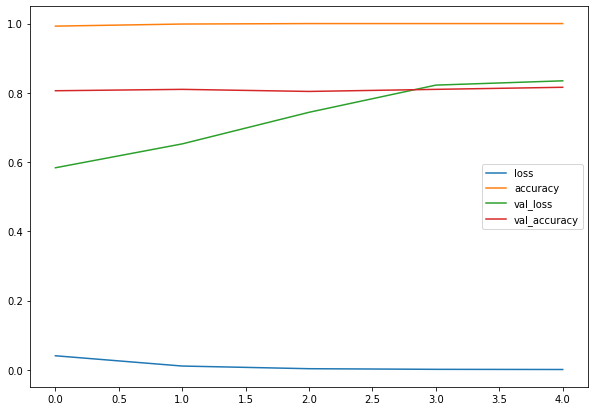

In [47]:
import pandas as pd
pd.DataFrame(history4.history).plot(figsize=(10,7))

In [27]:
# Plot the validation and training data separately
def plotcurves(history):

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  # Plot loss
  plt.plot(epochs, loss, label='training_loss')
  plt.plot(epochs, val_loss, label='val_loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()

  # Plot accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label='training_accuracy')
  plt.plot(epochs, val_accuracy, label='val_accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend();

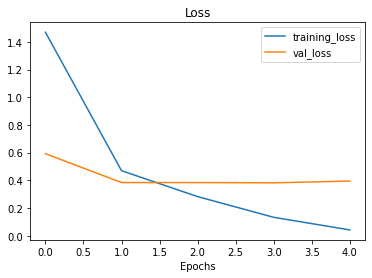

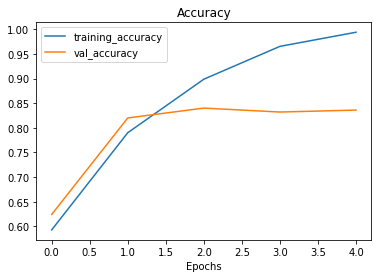

In [52]:
plotcurves(history4)

The accuracy indicating that the model is overfitting, meaning the model is not learning, instead the model remembering the pattern from the training set so the model perform poorly on the validation set. 

# Adjusting model

In [53]:
model5 = Sequential([
                     Conv2D(filters=10, #number of sliding windows flitering our images
                            kernel_size=3, #size of that windows
                            strides=1, #size of the step sliding windows take when filtering our images
                            padding='valid',
                            activation='relu',
                            input_shape=(224, 224, 3)),
                     MaxPool2D(pool_size=2),
                     Conv2D(10, 3, activation='relu'),
                     MaxPool2D(pool_size=2),
                     Conv2D(10, 3, activation='relu'),
                     MaxPool2D(pool_size=2),
                     Flatten(),
                     Dense(1, activation='sigmoid')

])

model5.compile(loss='binary_crossentropy',
               optimizer=Adam(),
               metrics=['accuracy'])

history5 = model5.fit(train_data, #combination labels and sample data, so dont have to pass x and y
           epochs = 5,
           steps_per_epoch = len(train_data),
           validation_data = test_data,
           validation_steps = len(test_data))

Epoch 1/5
47/47 [==============================] - 9s 181ms/step - loss: 0.6467 - accuracy: 0.5945 - val_loss: 0.5503 - val_accuracy: 0.6780
Epoch 2/5
47/47 [==============================] - 8s 176ms/step - loss: 0.4921 - accuracy: 0.7654 - val_loss: 0.3543 - val_accuracy: 0.8440
Epoch 3/5
47/47 [==============================] - 8s 175ms/step - loss: 0.4087 - accuracy: 0.8185 - val_loss: 0.3907 - val_accuracy: 0.8360
Epoch 4/5
47/47 [==============================] - 8s 174ms/step - loss: 0.3749 - accuracy: 0.8503 - val_loss: 0.3109 - val_accuracy: 0.8760
Epoch 5/5
47/47 [==============================] - 8s 175ms/step - loss: 0.3663 - accuracy: 0.8542 - val_loss: 0.3000 - val_accuracy: 0.8840


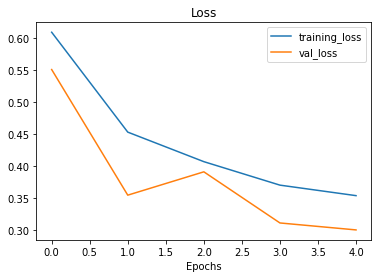

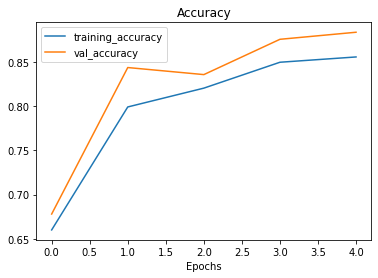

In [54]:
plotcurves(history5)

In [55]:
model1.evaluate(test_data)
model5.evaluate(test_data)

16/16 [==============================] - 2s 127ms/step - loss: 0.3000 - accuracy: 0.8840


[0.30001208186149597, 0.8840000033378601]

In [56]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

In [58]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
flatten_6 (Flatten)          (None, 475240)            0         
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 475241    
Total params: 477,341
Trainable params: 477,341
Non-trainable params: 0
_________________________________________________________________


In [57]:
model5.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 6760)             

Our model perform better, but can we improve it further?

# Data Augmentation

In [59]:
#Create ImageDataGenerator class
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2, # rotate the image slightly
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

# Create ImageDataGenerator training instance without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.) 

# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.) 

Data augmentation is process of altering data, creating more variation, allowing model to generalize pattern.

In [97]:
# Import data and augment it from training directory
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=False) # Don't shuffle for demonstration purposes, usually good idea to shuffle

# Create non-augmented data batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='binary',
                                               shuffle=False) # Don't shuffle for demonstration purposes

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='binary')

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [61]:
#visualize the data
images, labels = train_data.next()
augmented_images, augmented_labels = train_data_augmented.next()

(-0.5, 223.5, 223.5, -0.5)

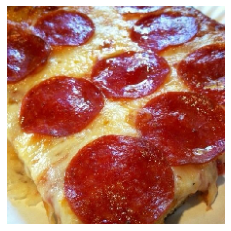

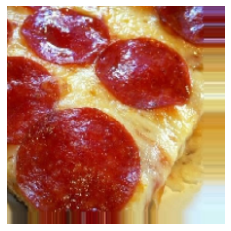

In [87]:
import random
random_number = random.randint(0, 31)
plt.imshow(images[random_number])
plt.axis(False)
plt.figure()
plt.imshow(augmented_images[random_number])
plt.axis(False)

In [98]:
# Create the model (same as model_5)
model6 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model6.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history6 = model6.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 20s 420ms/step - loss: 0.7559 - accuracy: 0.4466 - val_loss: 0.6816 - val_accuracy: 0.6140
Epoch 2/5
47/47 [==============================] - 19s 414ms/step - loss: 0.7222 - accuracy: 0.5651 - val_loss: 0.6798 - val_accuracy: 0.5020
Epoch 3/5
47/47 [==============================] - 20s 416ms/step - loss: 0.6942 - accuracy: 0.4696 - val_loss: 0.6749 - val_accuracy: 0.5780
Epoch 4/5
47/47 [==============================] - 20s 416ms/step - loss: 0.6887 - accuracy: 0.5507 - val_loss: 0.6587 - val_accuracy: 0.6440
Epoch 5/5
47/47 [==============================] - 19s 415ms/step - loss: 0.6808 - accuracy: 0.6414 - val_loss: 0.6432 - val_accuracy: 0.6020


In [90]:
model6.evaluate(test_data)

16/16 [==============================] - 2s 128ms/step - loss: 0.6906 - accuracy: 0.5900


[0.6906037330627441, 0.5899999737739563]

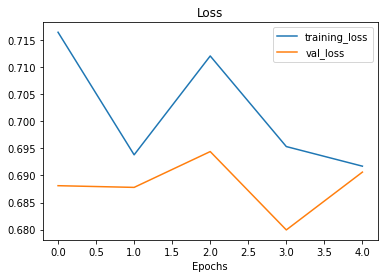

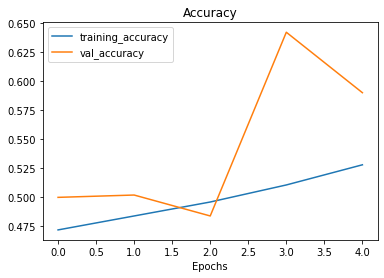

In [91]:
plotcurves(history6)

So why the model train longer and perform worse?

it train longer because the data went trough augmentation process as it get feeded to the model

it perform worse because when we created train_data_augmented we turned off data shuffling using shuffle=False which means our model only sees a batch of a single kind of images at a time.

In [99]:
train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                   target_size=(224, 224),
                                                                   batch_size=32,
                                                                   class_mode='binary',
                                                                   shuffle=True) # Don't shuffle for demonstration purposes, usually good idea to shuffle

Found 1500 images belonging to 2 classes.


In [95]:
# Create the model (same as model_5)
model7 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(pool_size=2), # reduce number of features by half
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(1, activation='sigmoid')
])

# Compile the model
model7.compile(loss='binary_crossentropy',
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model
history7 = model7.fit(train_data_augmented, # changed to augmented training data
                        epochs=5,
                        steps_per_epoch=len(train_data_augmented),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 20s 418ms/step - loss: 0.6592 - accuracy: 0.5822 - val_loss: 0.4921 - val_accuracy: 0.7800
Epoch 2/5
47/47 [==============================] - 19s 409ms/step - loss: 0.5594 - accuracy: 0.7014 - val_loss: 0.3578 - val_accuracy: 0.8380
Epoch 3/5
47/47 [==============================] - 19s 411ms/step - loss: 0.4655 - accuracy: 0.7817 - val_loss: 0.3668 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 19s 411ms/step - loss: 0.4636 - accuracy: 0.7788 - val_loss: 0.3476 - val_accuracy: 0.8540
Epoch 5/5
47/47 [==============================] - 19s 411ms/step - loss: 0.4466 - accuracy: 0.7850 - val_loss: 0.3289 - val_accuracy: 0.8680


In [100]:
model1.evaluate(test_data)
model2.evaluate(test_data)
model3.evaluate(test_data)
model4.evaluate(test_data)
model5.evaluate(test_data)
model6.evaluate(test_data)
model7.evaluate(test_data)

16/16 [==============================] - 2s 130ms/step - loss: 0.3289 - accuracy: 0.8680


[0.328939825296402, 0.8679999709129333]

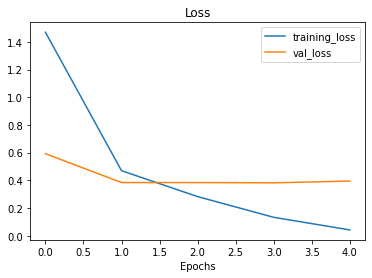

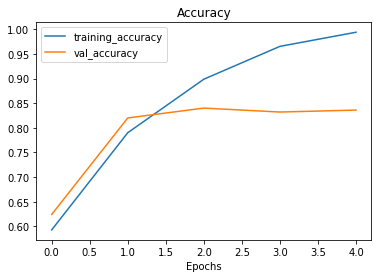

In [103]:
plotcurves(history4)

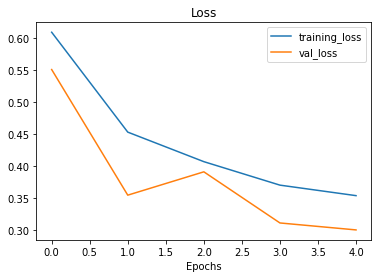

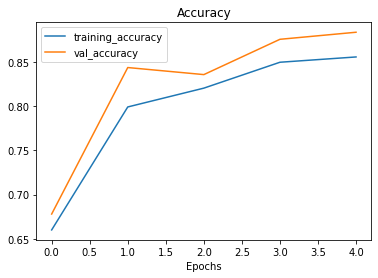

In [104]:
plotcurves(history5)

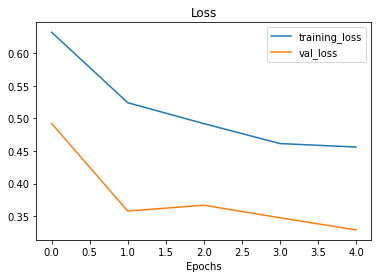

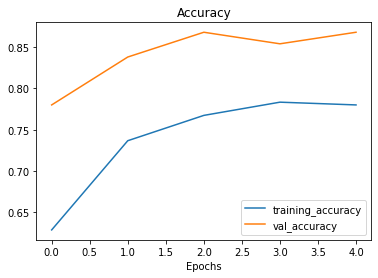

In [105]:
plotcurves(history7)

# Make Prediction

--2021-05-22 18:01:15--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg.1’

03-steak.jpeg.1     100%[===================>]   1.89M  --.-KB/s    in 0.09s   

2021-05-22 18:01:15 (20.2 MB/s) - ‘03-steak.jpeg.1’ saved [1978213/1978213]



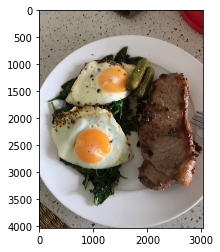

In [107]:
import matplotlib.image as mpimg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
steak = mpimg.imread('03-steak.jpeg')
plt.imshow(steak)

In [109]:
# model5.predict(steak)
# will get error, like usual, shape issues, we need to preprocess the image first

ValueError: ignored

In [110]:
steak.shape
#our model trained on (224, 224, 3) shape

(4032, 3024, 3)

In [137]:
steak2= tf.image.resize(tf.image.decode_image(tf.io.read_file('03-steak.jpeg')), size=[224, 224])/255.
steak2.shape

TensorShape([224, 224, 3])

In [58]:
def loadandprep(filename, img_shape=224):
  # Read image
  img = tf.io.read_file(filename)
  # Decode into tensor
  img = tf.image.decode_jpeg(img)
  # Resize
  img = tf.image.resize(img, [img_shape, img_shape])
  # Rescale 
  img = img/255.
  return img

In [148]:
pred = model5.predict(tf.expand_dims(steak2, axis = 0))
pred

array([[0.8835502]], dtype=float32)

our model results are probability of positive class

In [149]:
pred_class = class_names[int(tf.round(pred))]
pred_class

'steak'

In [57]:
def predandplot(model, filename, class_names=class_names):
  img = loadandprep(filename)
  pred = model5.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[int(tf.round(pred))]
  plt.imshow(img)
  plt.title(pred_class)

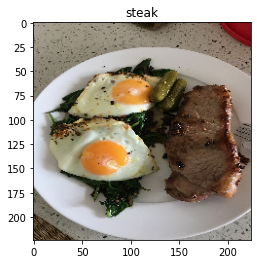

In [152]:
predandplot(model7, '03-steak.jpeg')

# MultiClass Classification

when yyou have 3 or more class target.

In [17]:
#import data

import zipfile
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip 

# unzip
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2021-05-23 06:47:57--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.20.128, 173.194.202.128, 74.125.142.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.20.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip.1’

10_food_classes_all 100%[===================>] 495.13M   268MB/s    in 1.8s    

2021-05-23 06:47:59 (268 MB/s) - ‘10_food_classes_all_data.zip.1’ saved [519183241/519183241]



In [18]:
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [19]:
# Get class names
import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # Extract the class names from data directory
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


['544697.jpg']
Image shape: (512, 512, 3)


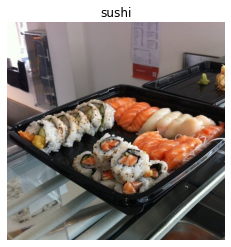

In [20]:
img = viewrandom(target_dir=train_dir,
                        target_class=random.choice(class_names))

# 2. Preprocess the data

In [21]:
#Unaugmented
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Rescale the data and create data generator instances
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224, 224),
                                               batch_size=32,
                                               class_mode='categorical') # changed to categorical

test_data = train_datagen.flow_from_directory(test_dir,
                                              target_size=(224, 224),
                                              batch_size=32,
                                              class_mode='categorical')

Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


# 3. Build a model

our model will be similar with previous model used for 2 classes, but we will tweak it a little bit:
- we will use 10 nodes for our output(representing 10 classes to be predicted)
- use softmax activation for our output nodes
- change loss func to 'categorical_crossentropy' instead of binary for 2 classes

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# Create our model (a clone of model_8, except to be multi-class)
model9 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model9.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

In [25]:
# fit (run it on GPU to speed up the processes)
history9 = model9.fit(train_data, # now 10 different classes instead of 2
                        epochs=5,
                        steps_per_epoch=len(train_data),
                        validation_data=test_data,
                        validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 76s 183ms/step - loss: 2.2150 - accuracy: 0.1744 - val_loss: 1.9747 - val_accuracy: 0.2928
Epoch 2/5
235/235 [==============================] - 43s 184ms/step - loss: 1.8614 - accuracy: 0.3669 - val_loss: 1.9297 - val_accuracy: 0.3096
Epoch 3/5
235/235 [==============================] - 43s 185ms/step - loss: 1.4458 - accuracy: 0.5229 - val_loss: 2.0939 - val_accuracy: 0.3224
Epoch 4/5
235/235 [==============================] - 43s 183ms/step - loss: 0.7962 - accuracy: 0.7513 - val_loss: 2.5903 - val_accuracy: 0.3016
Epoch 5/5
235/235 [==============================] - 43s 181ms/step - loss: 0.2954 - accuracy: 0.9180 - val_loss: 3.8262 - val_accuracy: 0.2640


# 4. Evaluate model

In [26]:
model9.evaluate(test_data)

79/79 [==============================] - 10s 126ms/step - loss: 3.8262 - accuracy: 0.2640


[3.826185941696167, 0.2639999985694885]

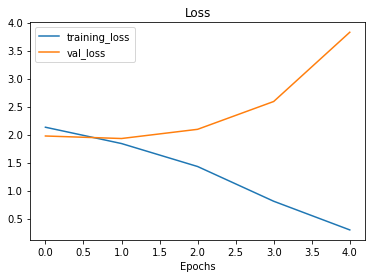

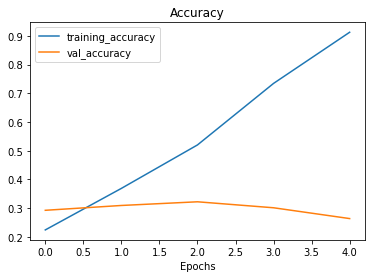

In [29]:
plotcurves(history9)

the model indicating overfitting, high performance on training, low performance on test data, its not even close.

what can we do to improve it?

# Improving model

now we have a baseline model to work with, we can improve it by :
- Get more data to train
- rebuild the model, make it more complex or simple
- augment the data
- Transfer Learning

In [30]:
# Augmenting data

# Create augmented data generator instance

train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             width_shift_range=0.2,
                                             height_shift_range=0.2,
                                             zoom_range=0.2,
                                             horizontal_flip=True)

train_data_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                  target_size=(224, 224),
                                                                  batch_size=32,
                                                                  class_mode='categorical')

Found 7500 images belonging to 10 classes.


In [31]:
# Clone the model (use the same architecture)
model10 = tf.keras.models.clone_model(model9)

# Compile the cloned model
model10.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history10 = model10.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 101s 429ms/step - loss: 2.2791 - accuracy: 0.1590 - val_loss: 2.0664 - val_accuracy: 0.2376
Epoch 2/5
235/235 [==============================] - 102s 433ms/step - loss: 2.1105 - accuracy: 0.2394 - val_loss: 1.9897 - val_accuracy: 0.2860
Epoch 3/5
235/235 [==============================] - 103s 436ms/step - loss: 2.0541 - accuracy: 0.2635 - val_loss: 1.8919 - val_accuracy: 0.3296
Epoch 4/5
235/235 [==============================] - 102s 433ms/step - loss: 2.0104 - accuracy: 0.2934 - val_loss: 1.9127 - val_accuracy: 0.3128
Epoch 5/5
235/235 [==============================] - 101s 432ms/step - loss: 1.9974 - accuracy: 0.2997 - val_loss: 1.8334 - val_accuracy: 0.3684


In [32]:
model9.evaluate(test_data)
model10.evaluate(test_data)

79/79 [==============================] - 10s 129ms/step - loss: 1.8334 - accuracy: 0.3684


[1.8334095478057861, 0.3684000074863434]

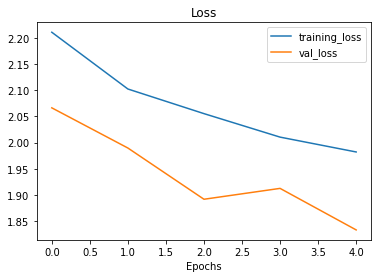

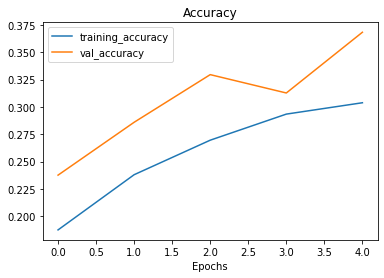

In [33]:
plotcurves(history10)

the model imrpoved, but what if we simplify the model? can we improve it further?

In [34]:
model11 = Sequential([
  Conv2D(10, 3, activation='relu', input_shape=(224, 224, 3)),
  MaxPool2D(),
  Conv2D(10, 3, activation='relu'),
  MaxPool2D(),
  Flatten(),
  Dense(10, activation='softmax') # changed to have 10 neurons (same as number of classes) and 'softmax' activation
])

# Compile the model
model11.compile(loss="categorical_crossentropy", # changed to categorical_crossentropy
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history11 = model11.fit(train_data_augmented, # use augmented data
                          epochs=5,
                          steps_per_epoch=len(train_data_augmented),
                          validation_data=test_data,
                          validation_steps=len(test_data))

Epoch 1/5
235/235 [==============================] - 101s 429ms/step - loss: 2.2365 - accuracy: 0.2024 - val_loss: 1.9547 - val_accuracy: 0.3172
Epoch 2/5
235/235 [==============================] - 98s 419ms/step - loss: 2.0523 - accuracy: 0.2760 - val_loss: 1.9320 - val_accuracy: 0.3204
Epoch 3/5
235/235 [==============================] - 102s 434ms/step - loss: 1.9851 - accuracy: 0.3048 - val_loss: 1.8661 - val_accuracy: 0.3404
Epoch 4/5
235/235 [==============================] - 102s 436ms/step - loss: 1.9415 - accuracy: 0.3286 - val_loss: 1.8184 - val_accuracy: 0.3692
Epoch 5/5
235/235 [==============================] - 106s 449ms/step - loss: 1.9066 - accuracy: 0.3518 - val_loss: 1.7600 - val_accuracy: 0.4048


In [36]:
model9.evaluate(test_data)
model10.evaluate(test_data)
model11.evaluate(test_data)

79/79 [==============================] - 11s 139ms/step - loss: 1.7600 - accuracy: 0.4048


[1.7599917650222778, 0.4047999978065491]

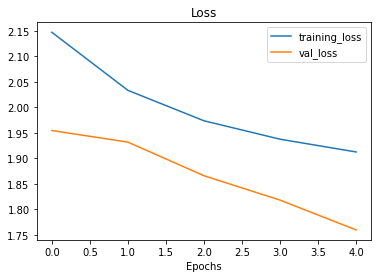

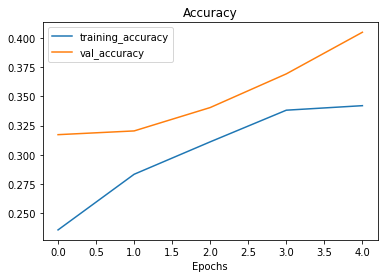

In [37]:
plotcurves(history11)

# Repeat until satisfied

with 5 epochs, the model hasnt converge yet, so theoritically we still able to improve the model by prolonged the training by increasing epochs number, but for now i will use the model as is to predict.

# PREDICT

In [38]:
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget -q https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

In [61]:
def predandplotimages(model, filename, class_names=class_names):
  img = loadandprep(filename)
  pred = model11.predict(tf.expand_dims(img, axis=0))
  pred_class = class_names[pred.argmax()] #we want to extract just one category that has the most values of probability, rather than rounding up the value
  plt.imshow(img)
  plt.title(pred_class)
  plt.axis(False)

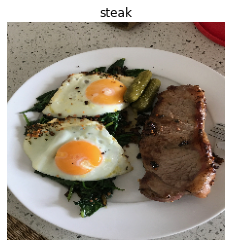

In [67]:
predandplotimages(model=model11, 
              filename="03-steak.jpeg",
            class_names=class_names)

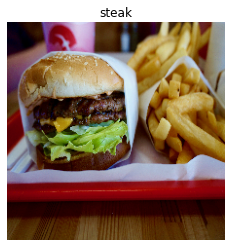

In [69]:
predandplotimages(model=model11, 
              filename="03-hamburger.jpeg",
            class_names=class_names)

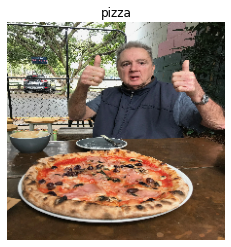

In [70]:
predandplotimages(model=model11, 
              filename="03-pizza-dad.jpeg",
            class_names=class_names)

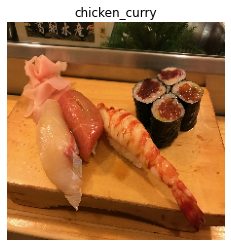

In [71]:
predandplotimages(model=model11, 
              filename="03-sushi.jpeg",
            class_names=class_names)

As expected our model does not correctly predict whats in the images, but the model is able to predict more than just pizza and steak.

# Save and Load model

In [72]:
model11.save("saved_trained_model")

INFO:tensorflow:Assets written to: saved_trained_model/assets


In [73]:
loadedmodel11 = tf.keras.models.load_model("saved_trained_model")
loadedmodel11.evaluate(test_data)

79/79 [==============================] - 11s 138ms/step - loss: 1.7600 - accuracy: 0.4048


[1.7599917650222778, 0.4047999978065491]

In [74]:
model11.evaluate(test_data)

79/79 [==============================] - 11s 140ms/step - loss: 1.7600 - accuracy: 0.4048


[1.759992241859436, 0.4047999978065491]